In [1]:
import pandas as pd
import csv
import plotly.express as px

In [2]:
# Specify the path to your CSV file
file_path = './ageVsExperienceData.csv'  # Replace with the path to your CSV file

# Read the CSV file into a DataFrame
grouped_df = pd.read_csv(file_path)

# Rename columns to match the desired output format
grouped_df.rename(columns={
    'driverID': 'Driver',
    'year': 'Year',
    'age': 'Age',
    'experience': 'Experience',
    'points': 'Total_Points'
}, inplace=True)
    

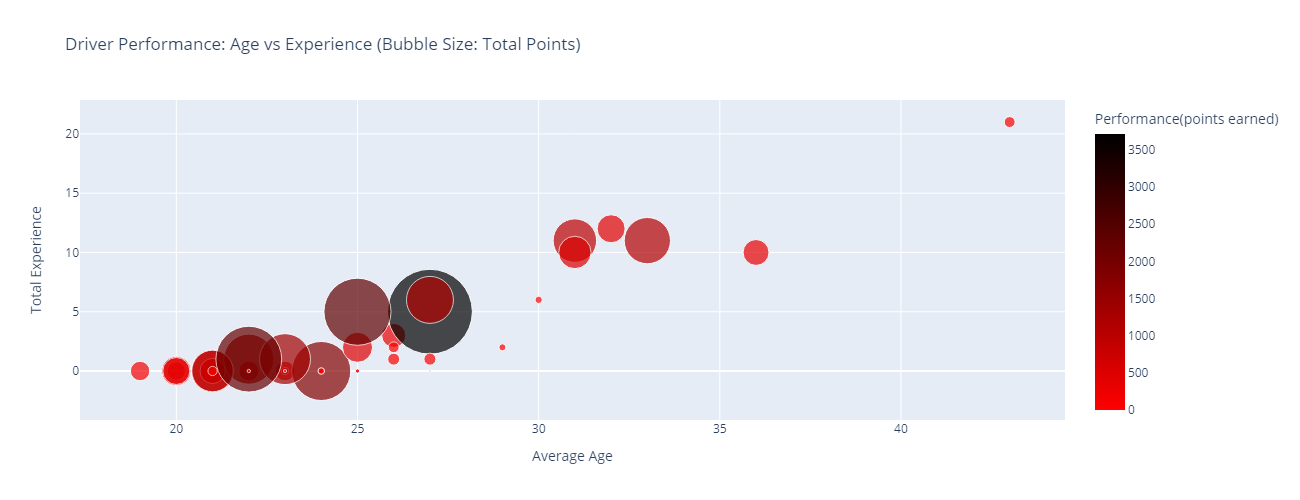

In [3]:
#Draw plot for gauging driver performance with respect to Age vs Experience
agg_df = grouped_df.groupby('driverCode').agg({
    'Age': 'first',  
    'Experience': 'first',  
    'Total_Points': 'sum'  
}).reset_index()

# Create an interactive bubble chart using Plotly
fig = px.scatter(agg_df, x='Age', y='Experience', size='Total_Points', color='Total_Points',
                 hover_name='driverCode', size_max=60, title='Driver Performance: Age vs Experience (Bubble Size: Total Points)', color_continuous_scale=[(0, 'red'), (1, 'black')])
fig.update_layout(coloraxis_colorbar=dict(title='Performance(points earned)'))

# Add axis labels
fig.update_layout(xaxis_title='Average Age', yaxis_title='Total Experience', width=1300)

# Show the plot
fig.show(renderer="png")